In [2]:
import t1_mapping
import numpy as np
import os
import matplotlib.pyplot as plt
from adam_utils.nifti import plot_nifti
import nibabel as nib

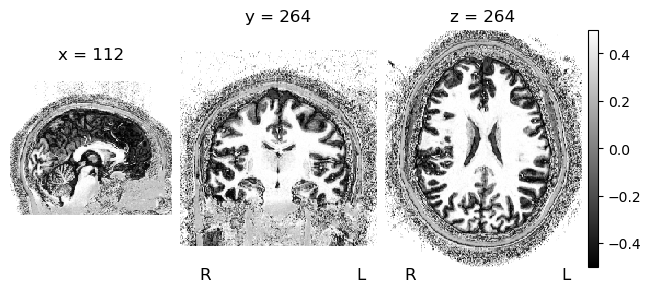

In [3]:
folder = os.path.join(t1_mapping.definitions.OUTPUTS, 'mp2rage_converted_v2023', '336547', '1101-x-MP2RAGE_0p8mm_1sTI_autoshim-x-MP2RAGE_0p8mm_1sTI_autoshim')
scan = '1101'
# folder = os.path.join(t1_mapping.definitions.OUTPUTS, 'mp2rage_converted_v2023', '334264', '401-x-WIPMP2RAGE_0p7mm_1sTI_best_oneSENSE-x-WIPMP2RAGE_0p7mm_1sTI_best_oneSENSE')
# scan = '401'
gre1_r = nib.load(os.path.join(folder, f'{scan}_real_t1010.nii'))
gre1_i = nib.load(os.path.join(folder, f'{scan}_imaginary_t1010.nii'))
gre2_r = nib.load(os.path.join(folder, f'{scan}_real_t3310.nii'))
gre2_i = nib.load(os.path.join(folder, f'{scan}_imaginary_t3310.nii'))

gre1_data = gre1_r.get_fdata() + 1j*gre1_i.get_fdata()
gre2_data = gre2_r.get_fdata() + 1j*gre2_i.get_fdata()
mp2rage_data = np.real((np.conj(gre2_data) * gre1_data)/(np.abs(gre1_data)**2 + np.abs(gre2_data)**2))
mp2rage = nib.Nifti1Image(mp2rage_data, gre1_r.affine)

# Show MP2RAGE images
fig, ax = plot_nifti(mp2rage)

mp2rage.to_filename('/nfs/masi/saundam1/outputs/t1_mapping/test/mp2rage_issue.nii.gz')